In [40]:
import xarray as xr 
import matplotlib.pyplot as plt
import cmocean
import numpy as np

In [17]:
def load_and_swap(path):
    ds = xr.open_dataset(path)
    ds = ds.swap_dims({"obs": "time"}).reset_coords(drop=True)
    return ds

In [18]:
ctd = load_and_swap("mooring_data/deployment0019_CE04OSSM-RID27-03-CTDBPC000-telemetered-ctdbp_cdef_dcl_instrument_20250616T114503.955000-20250717T000002.629000.nc")

In [19]:
do = load_and_swap("mooring_data/deployment0019_CE04OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20250617T000013.637000-20250716T234832.964000.nc")

In [20]:
met = load_and_swap("mooring_data/deployment0019_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_hourly_20250617T003013.339000-20250716T233016.253000.nc")

In [21]:
co2_air = load_and_swap("mooring_data/deployment0019_CE04OSSM-SBD12-04-PCO2AA000-telemetered-pco2a_a_dcl_instrument_air_20250617T000206.076000-20250716T230207.642000.nc")

In [22]:
co2_wat = load_and_swap("mooring_data/deployment0019_CE04OSSM-SBD12-04-PCO2AA000-telemetered-pco2a_a_dcl_instrument_air_20250617T000206.076000-20250716T230207.642000.nc")

In [23]:
wav = load_and_swap("mooring_data/deployment0019_CE04OSSM-SBD12-05-WAVSSA000-telemetered-wavss_a_dcl_non_directional_20250617T002301.548000-20250716T232304.352000.nc")

In [24]:
adcp = load_and_swap("mooring_data/deployment0019_CE04OSSM-RID26-01-ADCPTC000-telemetered-adcp_velocity_earth_20250617T000232.189000-20250716T234652.637000.nc")

In [127]:
met

<xarray.Dataset> Size: 184kB
Dimensions:                  (time: 720)
Coordinates:
  * time                     (time) datetime64[ns] 6kB 2025-06-17T00:30:13.33...
Data variables: (12/56)
    met_tempskn_qc_results   (time) uint8 720B ...
    met_latnflx              (time) float64 6kB ...
    met_latnflx_qc_executed  (time) uint8 720B ...
    met_rainflx              (time) float64 6kB nan nan nan nan ... 0.0 0.0 0.0
    met_netlirr_qc_executed  (time) uint8 720B ...
    met_stablty              (time) float64 6kB ...
    ...                       ...
    sea_surface_temperature  (time) float64 6kB ...
    met_buoyflx_qc_executed  (time) uint8 720B ...
    met_heatflx              (time) float64 6kB ...
    met_relwind_speed        (time) float64 6kB ...
    met_frshflx              (time) float64 6kB ...
    met_sphum2m_qc_results   (time) uint8 720B ...
Attributes: (12/57)
    node:                            SBD11
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               telemetered
    stream:                          metbk_hourly
    ...                              ...
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertical_positive:    down
    lat:                             44.36528
    lon:                             -124.93947

In [129]:
def basic_plot(da):
    plt.figure(figsize=(19, 6))
    plt.title(da.attrs['long_name'])
    plt.plot(da.time, da.values)
    plt.ylabel(da.attrs['units'])
    plt.margins(x=0)

In [130]:
ctd.sea_water_temperature

<xarray.DataArray 'sea_water_temperature' (time: 2892)> Size: 12kB
array([10.83  , 12.2244, 12.1586, ..., 11.8446, 11.9312, 12.2588],
      shape=(2892,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2025-06-16T11:45:03.954999808 ... 202...
Attributes:
    comment:                   Seawater temperature near the sensor.
    long_name:                 Seawater Temperature
    precision:                 4
    data_product_identifier:   TEMPWAT_L1
    standard_name:             sea_water_temperature
    units:                     degrees_Celsius
    alternate_parameter_name:  temp

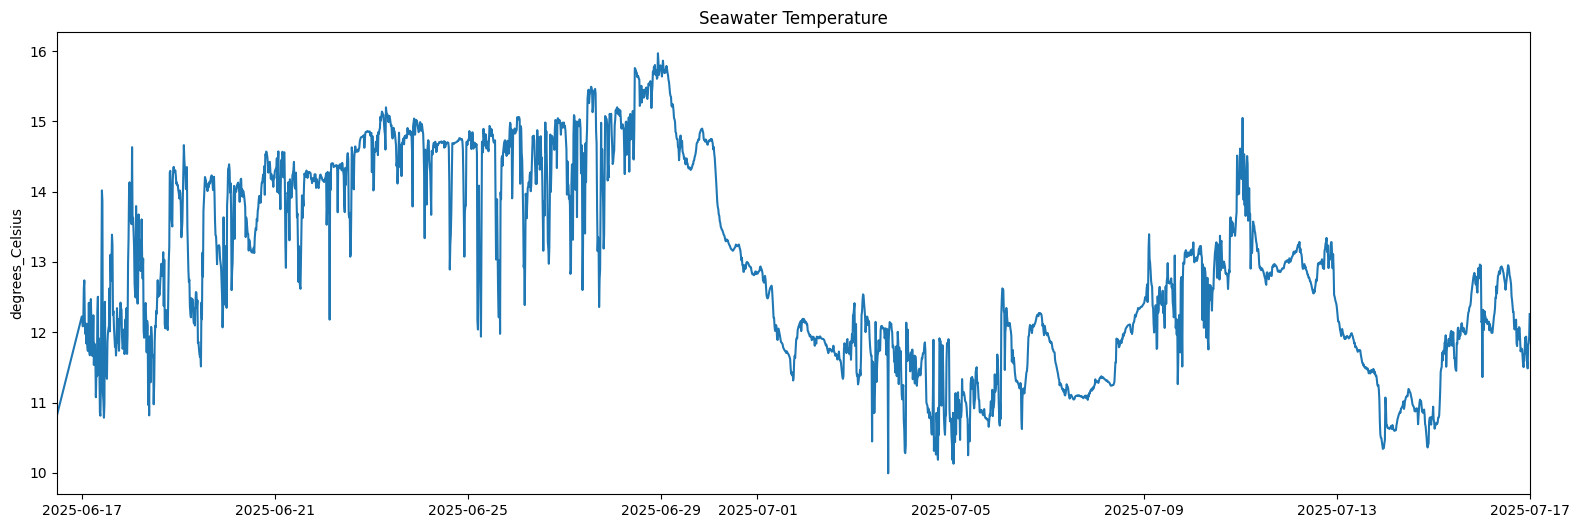

In [131]:
basic_plot(ctd.sea_water_temperature)

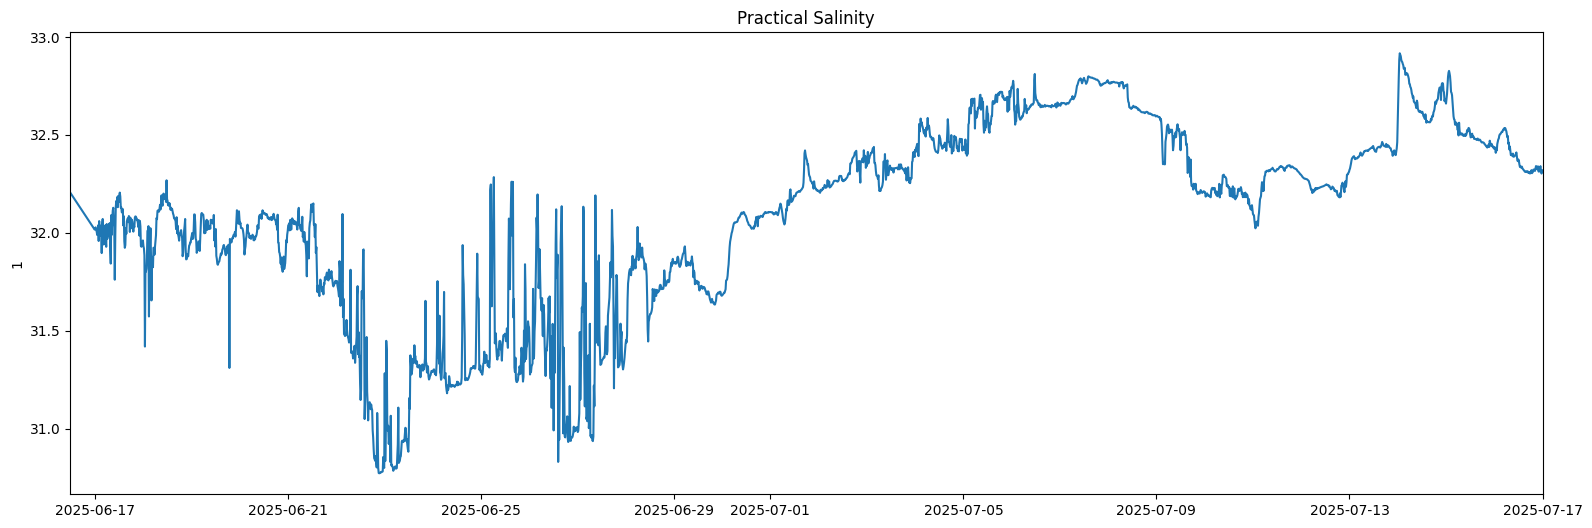

In [132]:
basic_plot(ctd.sea_water_practical_salinity)

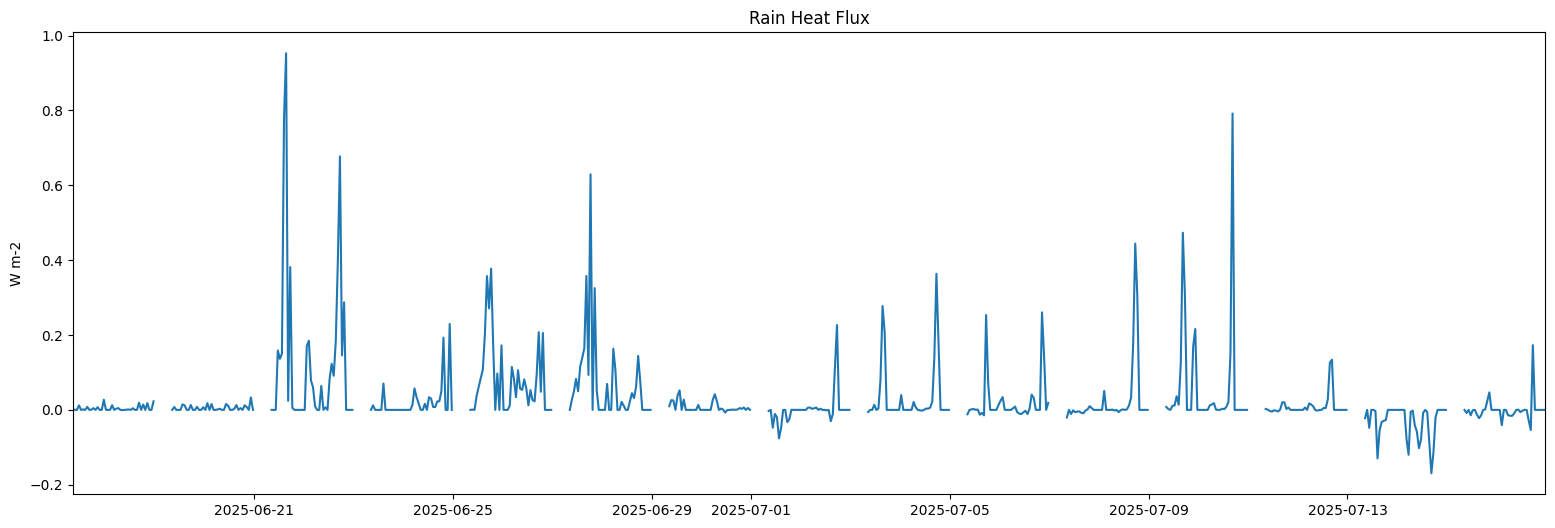

In [133]:
basic_plot(met.met_rainflx)

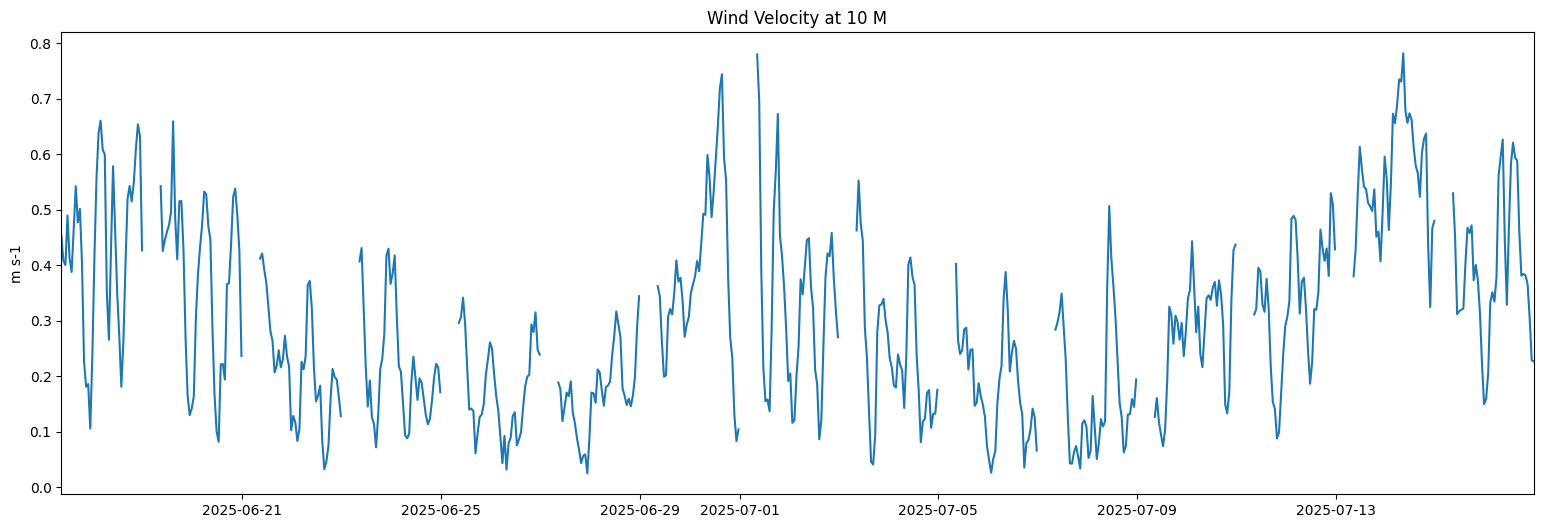

In [134]:
basic_plot(met.met_wind10m)

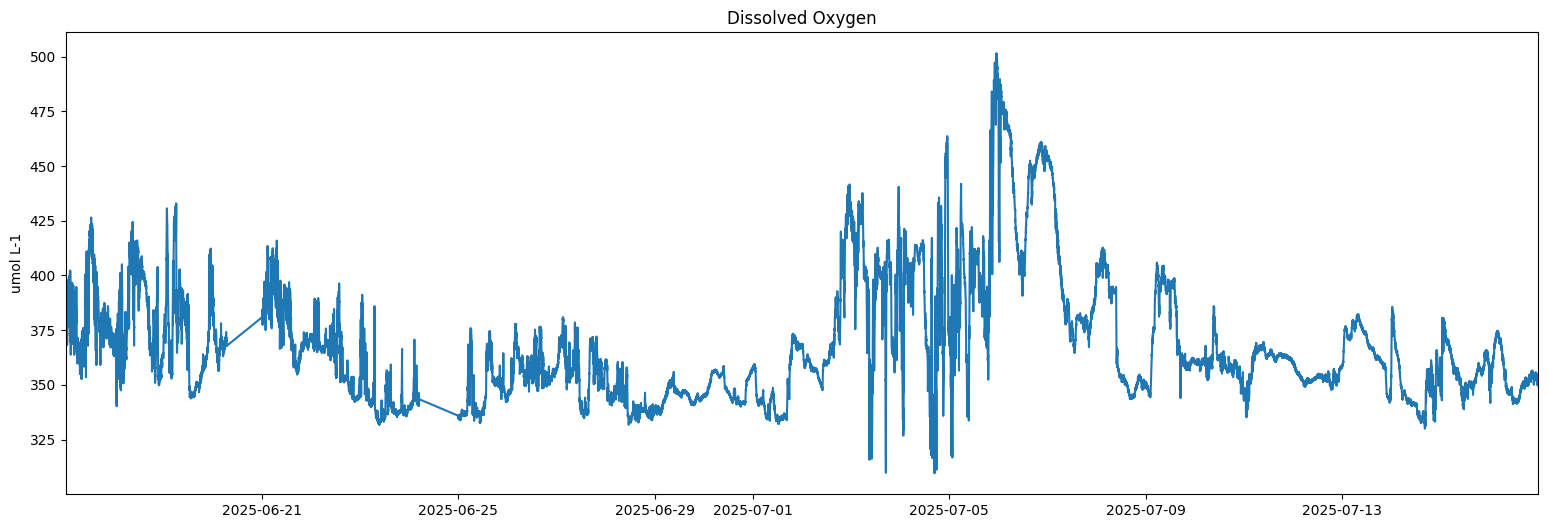

In [135]:
basic_plot(do.estimated_oxygen_concentration)

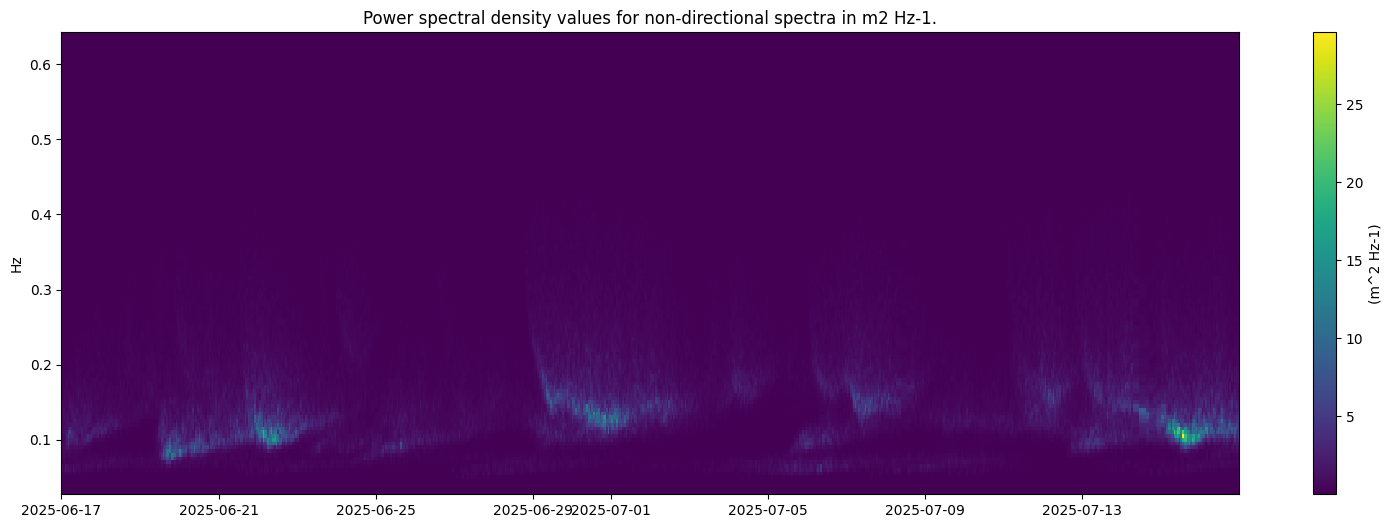

In [38]:
plt.figure(figsize=(19,6))
plt.title(wav.psd_non_directional.attrs["comment"])
plt.pcolormesh(wav.time, wav.wavss_a_non_directional_frequency.T, wav.psd_non_directional.T, cmap='viridis')
plt.ylabel(wav.wavss_a_non_directional_frequency.attrs["units"])
plt.colorbar(label=f"({wav.psd_non_directional.attrs['units']})")

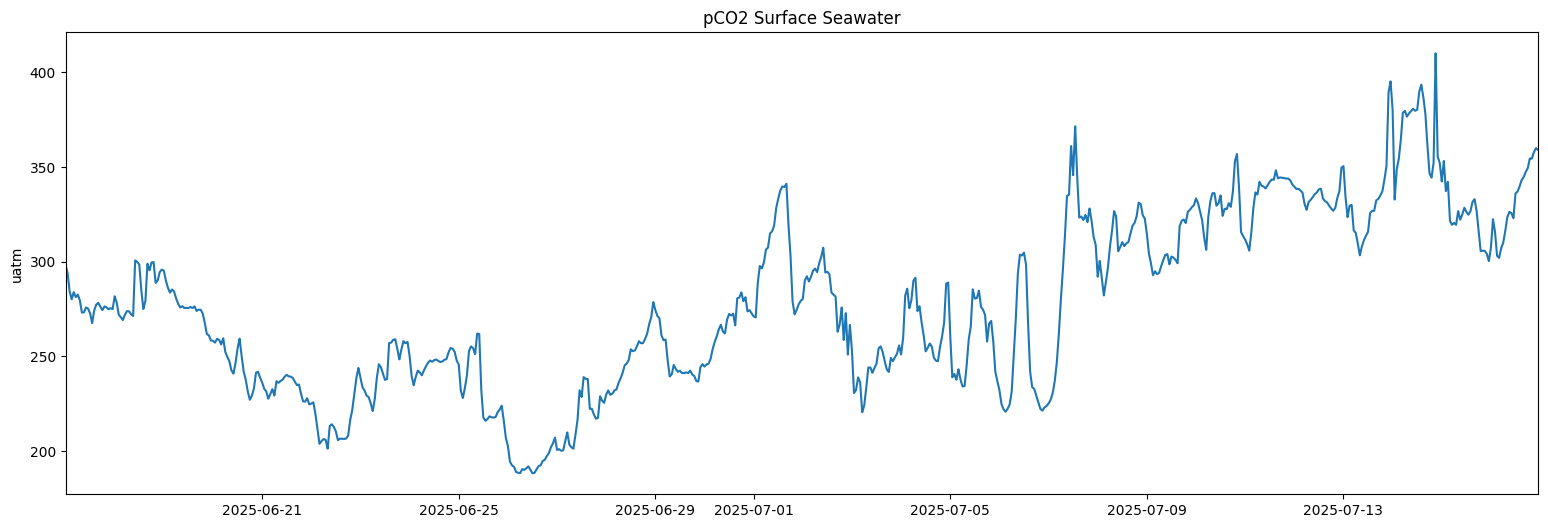

In [137]:
basic_plot(co2_wat.partial_pressure_co2_ssw)

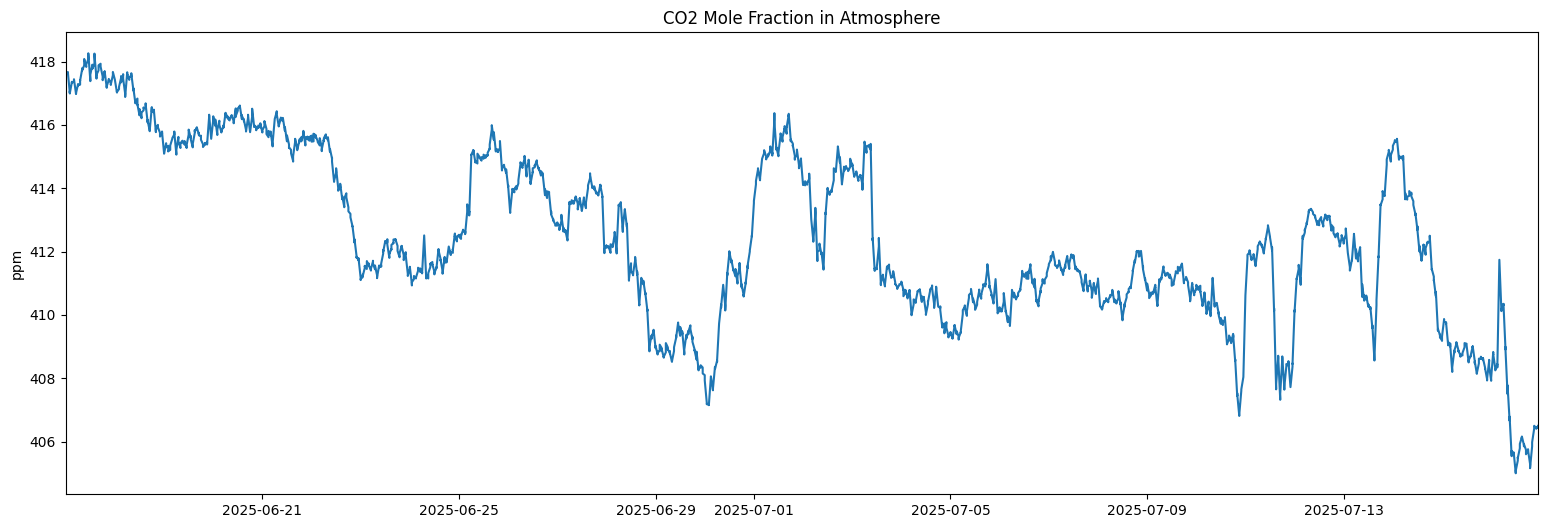

In [138]:
basic_plot(co2_wat.measured_air_co2)

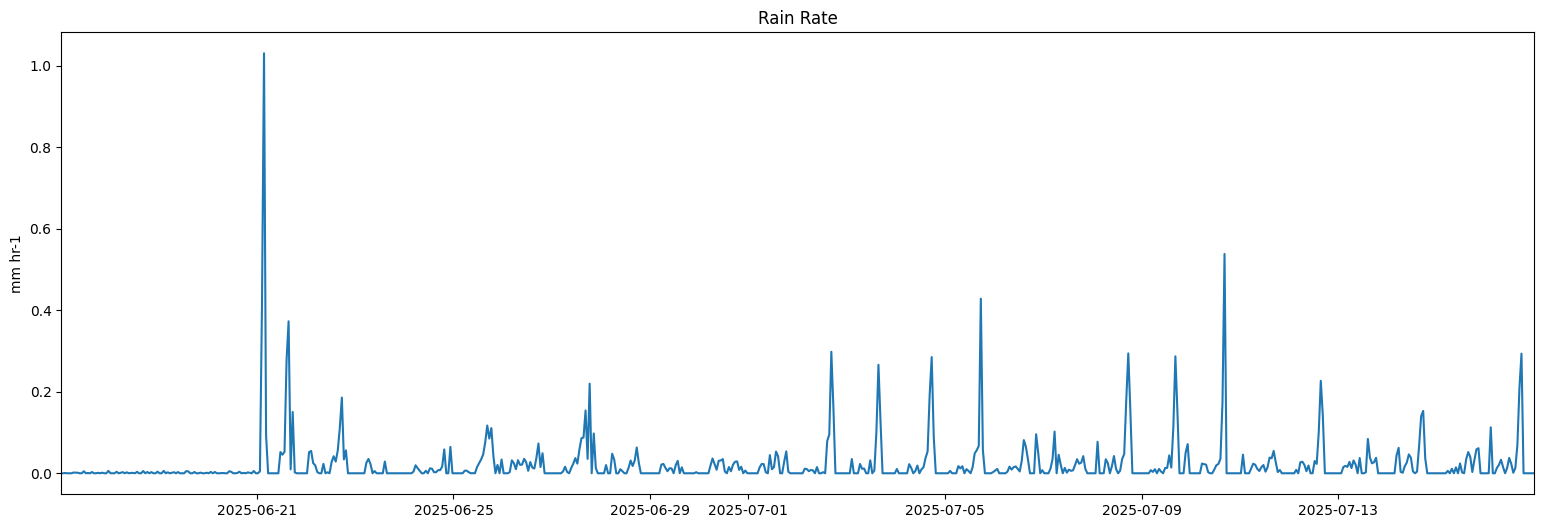

In [139]:
basic_plot(met.met_rainrte)

In [7]:
adcp.water_velocity_north

<xarray.DataArray 'water_velocity_north' (time: 2843, bin: 48)> Size: 546kB
[136464 values with dtype=float32]
Coordinates:
  * bin      (bin) int32 192B 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
  * time     (time) datetime64[ns] 23kB 2025-06-17T00:02:32.189000192 ... 202...
Attributes:
    comment:                  A Velocity Profile includes water velocity (spe...
    long_name:                Northward Seawater Velocity
    precision:                0
    data_product_identifier:  VELPROF-VLN_L0
    standard_name:            northward_sea_water_velocity
    units:                    mm s-1

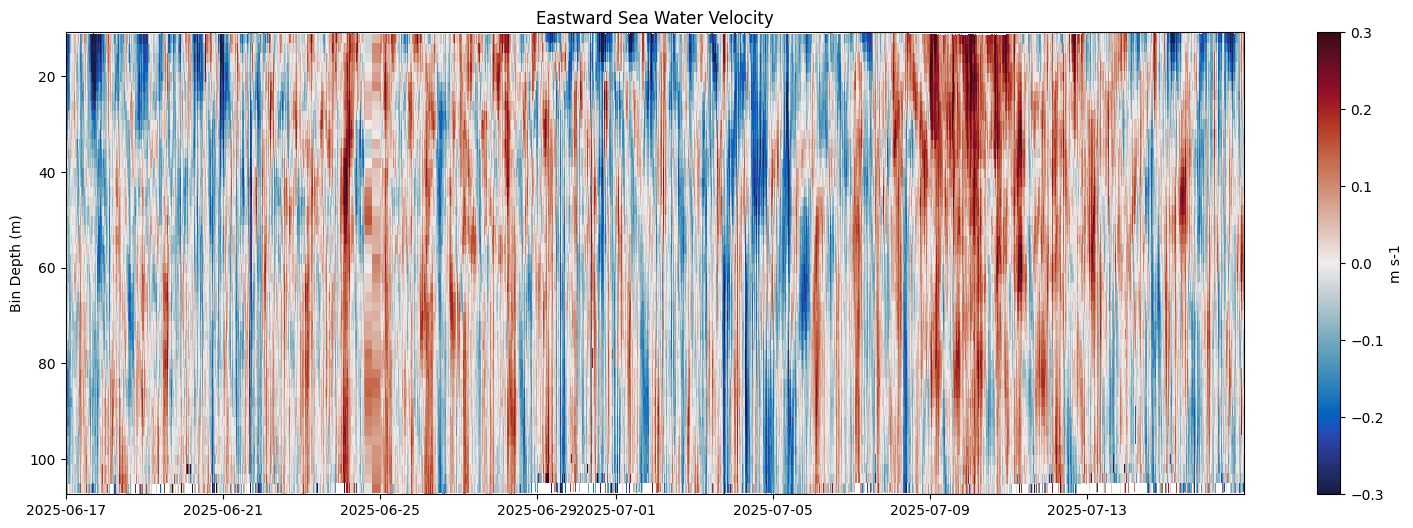

In [51]:
plt.figure(figsize=(19, 6))
plt.pcolormesh(adcp.time, adcp.bin_depths.T, adcp.eastward_seawater_velocity.T, vmax=0.3, vmin=-0.3, cmap='cmo.balance')
plt.gca().invert_yaxis()
plt.title(adcp.eastward_seawater_velocity.attrs["long_name"])
plt.ylabel("Bin Depth (m)")
plt.colorbar(label=adcp.eastward_seawater_velocity.attrs["units"])

In [45]:
adcp

<xarray.Dataset> Size: 21MB
Dimensions:                                      (time: 2843, bin: 48)
Coordinates:
  * bin                                          (bin) int32 192B 0 1 ... 46 47
  * time                                         (time) datetime64[ns] 23kB 2...
Data variables: (12/60)
    corrected_echo_intensity_beam4               (time, bin) float64 1MB ...
    num_cells                                    (time) float32 11kB ...
    temperature_qartod_executed                  (time) <U1 11kB ...
    ensemble_number                              (time) float32 11kB ...
    transducer_depth                             (time) float32 11kB ...
    corrected_echo_intensity_beam3               (time, bin) float64 1MB ...
    ...                                           ...
    correlation_magnitude_beam2                  (time, bin) float32 546kB ...
    correlation_magnitude_beam3                  (time, bin) float32 546kB ...
    correlation_magnitude_beam1                  (time, bin) float32 546kB ...
    echo_intensity_beam4                         (time, bin) float32 546kB ...
    echo_intensity_beam3                         (time, bin) float32 546kB ...
    echo_intensity_beam1                         (time, bin) float32 546kB ...
Attributes: (12/57)
    node:                            RID26
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               telemetered
    stream:                          adcp_velocity_earth
    ...                              ...
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertical_positive:    down
    lat:                             44.36528
    lon:                             -124.93947

In [29]:
wav.psd_non_directional

<xarray.DataArray 'psd_non_directional' (time: 701, wavss_array: 123)> Size: 345kB
[86223 values with dtype=float32]
Coordinates:
  * wavss_array  (wavss_array) int32 492B 0 1 2 3 4 5 ... 118 119 120 121 122
  * time         (time) datetime64[ns] 6kB 2025-06-17T00:23:01.548000256 ... ...
Attributes:
    comment:                  Power spectral density values for non-direction...
    long_name:                PSD Non Directional
    precision:                4
    data_product_identifier:  WAVSTAT-PND_L0
    units:                    m^2 Hz-1